100000


/home/fzybot/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/fzybot/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


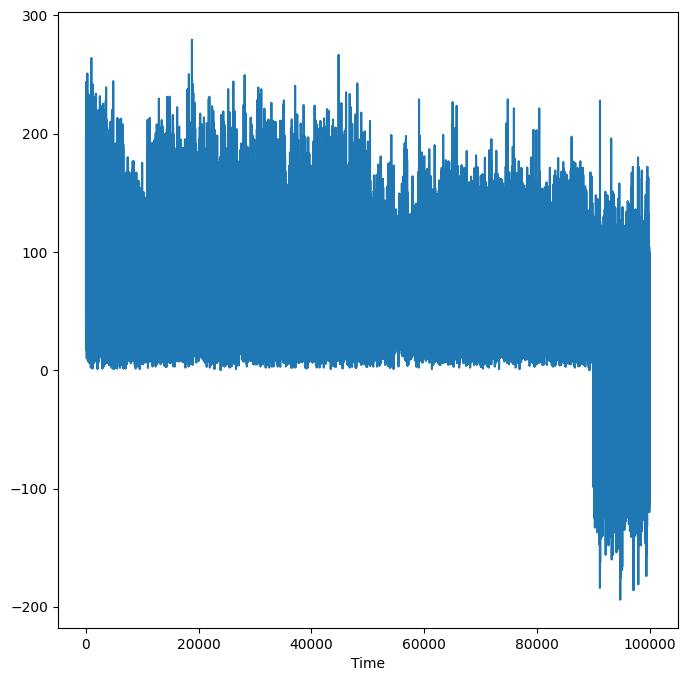

[197.0177657  +0.j 133.95894894 +0.j  75.         +0.j ...
   6.        -28.j  49.         -3.j  66.        -52.j]


PortAudioError: Error querying device -1

In [6]:
%matplotlib inline

import numpy as np
import adi
import matplotlib.pyplot as plt


# Попробуем отправить просто 1 синусоиду и принять ее же
sample_rate = 100e3 # Hz ширина полосы
center_freq = 900e6# Hz
num_samps = 10000 # number of samples per call to rx()

sdr = adi.Pluto("ip:192.168.2.1")
sdr.sample_rate = int(sample_rate)

# Config Rx
sdr.rx_lo = int(center_freq)
sdr.rx_rf_bandwidth = int(sample_rate)
sdr.rx_buffer_size = num_samps
sdr.gain_control_mode_chan0 = 'manual' #fast_attack, slow_attack
sdr.rx_hardwaregain_chan0 = 70.0 # dB, increase to increase the receive gain, but be careful not to saturate the ADC
sdr.tx_lo = int(center_freq)
sdr.tx_cyclic_buffer = True


# Receive samples
# big_array = np.array([])
# for i in range(10):
#     rx_samples = sdr.rx()
#     big_array = np.concatenate([abs(big_array), rx_samples])


# # Calculate power spectral density (frequency domain version of signal)
# # Plot time domain
# print(len(big_array))
# plt.figure(0, figsize=(8, 8))
# plt.plot(big_array)
# plt.xlabel("Time")

# plt.show()
# print(big_array)

# import sounddevice as sd

# fs = 44100

# sd.play(abs(big_array), fs)

hello
b'hello'
35
['1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1']
(16384+16384j)


/home/fzybot/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


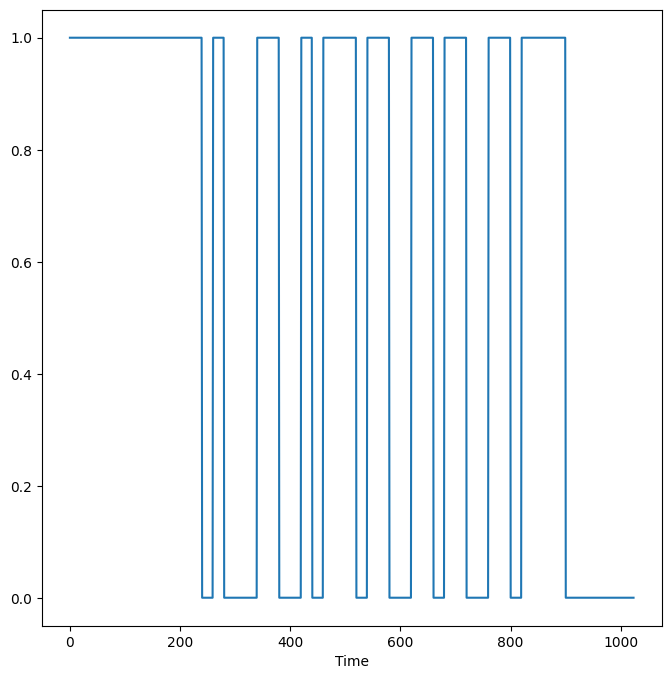

In [82]:
bit_num_samples = 20
sync_num_samples = bit_num_samples * 10
word = "hello"
print(word)

byte_word = word.encode('ascii') # переводим строку в массив байт по ascii таблице
print(byte_word)

bit_word = []
for i in range(len(byte_word)):
    bit_word += bin(byte_word[i])[2:] # переводим байты в биты и добавляем в конец массива (list)
print(len(bit_word))
print(bit_word)

num_symbols = 1024
samples = np.ones(num_symbols, dtype=complex)
for i in range(sync_num_samples):
    samples[i] = samples[i] * (2**14 + 1j * 2**14) # добавляем символы синхронизации 

i = 0
while(i < len(bit_word)): # 
    if bit_word[i] == '1':
        for j in range(bit_num_samples):
            samples[sync_num_samples + i*bit_num_samples + j] = samples[sync_num_samples + i*bit_num_samples+ j] * (2**14 + 1j * 2**14)
    i += 1
modulated_samples_max = max(samples)
print(modulated_samples_max)
samples = samples / modulated_samples_max
plt.figure(0, figsize=(8, 8))
plt.plot(samples)
plt.xlabel("Time")
plt.show()

URA
1171


/home/fzybot/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


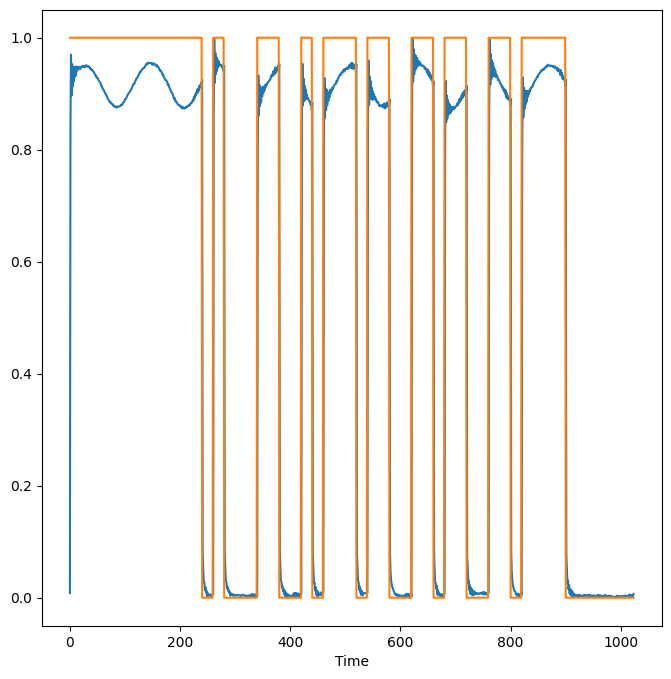

In [83]:
import time

# Поиск сигнала синхронизации и получение одного "фрейма" буфера TX = 1024 (пока 1024 - фиксированныое значение)
count = 0
maybe_samples = []
for i in range(len(big_array)):
    if((big_array[i]) > 700):
        count += 1
    elif((big_array[i]) < 200):
        count = 0
    if(count == sync_num_samples):
        print("URA")
        print(i)
        for j in range(1024):
            maybe_samples.append(big_array[i - sync_num_samples + j])
        break

rx_samples_max = max(maybe_samples)
maybe_samples = maybe_samples / rx_samples_max
plt.figure(0, figsize=(8, 8))
plt.plot(maybe_samples)
plt.plot(samples)
plt.xlabel("Time")

plt.show()